# Анализ рынка вакансий для HR Агентства
## Описание проекта
Цель исследование - выявить признаки вакансий, привлекающих наибольшее внимание кандидатов и успешно закрывающихся силами агентства. 
## План работы
1. Загрузка данных.
2. Предобработка данных.
3. Исследовательский анализ данных, генерация новых признаков.
4. Выдвижение гипотез и их проверка.
5. Выводы.

## Загрузка данных
Загрузим данные из файла и посмотрим на них.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('C:/Users/atash/Карьерный_трек/Мастерская/vacancy_clear.xlsx')

In [3]:
df.head()

,id,Статус,Источник лида,Менеджер,Дата публикации,Дата закрытия,Количество просмотров,Количество откликов,Позиция,Зарплата от,...,Формат оформления,Формат работы,Опыт,Образование,Занятость,Ссылка на тестовое,Обязательные требования,Дополнительный требования,Этапы отбора,Условия
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стаж...,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Наш стек: Python, fastapi, postgres, gitlab\nП...","Основные требования к ребятам, которые хотели ...",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nС...
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,NaN,...,ГПХ,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Частичная,нет,"1) Широкий IT-кругозор, понимание, какие бываю...",NaN,1) тестовое задание\n2) онлайн собеседование с...,ставка 750 рублей - за 1 обработанного кандида...
2,157,Архив,Реферальная,менеджер 9,2023-08-28,2023-10-03,37,8,JS-разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,умение самостоятельно разбираться в чужом коде...,Опыт коммерческой разработки на JS будет больш...,- Отклик с сопроводительным письмом обязательн...,"- Работа удаленная, оплата в форме оклада.\n- ..."
3,181,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,33,7,Младший разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- Высшее IT/техническое образование либо после...,- Базовое понимание объектов БД и их применени...,- Скрининг резюме_x000D_\n- Техническое интерв...,У нас вы получите возможность:_x000D_\n- Работ...
4,184,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,51,13,Младший аналитик,NaN,...,Трудовой договор,Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- ОБЯЗАТЕЛЬНО - Высшее ИТ/техническое образова...,Базовое понимание объектов БД и их применение_...,1. Скрининг резюме_x000D_\n2. Тестовое задание...,Стабильный оклад + премия по итогам года/проек...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1284 non-null   int64  
 1   Статус                     1284 non-null   object 
 2   Источник лида              1274 non-null   object 
 3   Менеджер                   1193 non-null   object 
 4   Дата публикации            1284 non-null   object 
 5   Дата закрытия              1127 non-null   object 
 6   Количество просмотров      1284 non-null   int64  
 7   Количество откликов        1284 non-null   int64  
 8   Позиция                    1284 non-null   object 
 9   Зарплата от                469 non-null    float64
 10  Зарплата до                372 non-null    float64
 11  Город                      1284 non-null   object 
 12  Формат оформления          1284 non-null   object 
 13  Формат работы              1284 non-null   objec

## Предобработка данных
Для начала изменим названия столбцов для удобства использования.

In [5]:
df.columns = [
    'id', 
    'status', 
    'lead', 
    'manager', 
    'date_start', 
    'date_end', 
    'views', 
    'responses', 
    'position', 
    'salary_start', 
    'salary_end',
    'city',
    'registration',
    'work_format',
    'experience',
    'education',
    'employment',
    'test_link',
    'mandatory_requirement',
    'additional_requirement',
    'selection_stages',
    'conditions'
]

Изменим тип данных в столбцах с датой на соответствующий.

In [6]:
df['date_start'] = pd.to_datetime(df['date_start'])
df['date_end'] = pd.to_datetime(df['date_end'])

Проверим данные на дубликаты.

In [7]:
df.duplicated().sum()

0

In [8]:
df['status'].unique()

array(['Архив', 'Закрыта нами', 'Отклонена', 'Активна', 'На рассмотрении'],
      dtype=object)

In [9]:
df['lead'].unique()

array(['Повторная', 'Входящая заявка', 'Реферальная', nan, 'Сорсинг'],
      dtype=object)

In [10]:
df['manager'].unique()

array(['менеджер 9', 'менеджер 6', nan, 'менеджер 3', 'менеджер 1',
       'менеджер 2', 'менеджер 7', 'менеджер 5', 'менеджер 8',
       'менеджер 4'], dtype=object)

In [11]:
df['city'].unique()

array(['Москва', 'Ростов-на-Дону', 'Санкт-Петербург', 'Челябинск',
       'Москва, Санкт-Петербург', 'Тбилиси', 'Новосибирск', 'Казань',
       'Москва, Тбилиси', 'Краснодар', 'Самара', 'Тула',
       'Москва, Ростов-на-Дону', 'Алматы, Ангарск, Москва',
       'Москва, Санкт-Петербург, Хабаровск, Иннополис, Самара',
       'Москва, Тбилиси, Санкт-Петербург', 'Алматы', 'Будва', 'Бишкек',
       'Нижний Новгород', 'Екатеринбург',
       'Калининград, Екатеринбург, Таганрог, Тверь, Казань, Тбилиси, Оренбург, Воронеж, Ульяновск, Петрозаводск, Самара',
       'Москва, Казань, Санкт-Петербург', 'Москва, Санкт-Петербург, Омск',
       'Пятигорск', 'Новороссийск, Екатеринбург, Санкт-Петербург',
       'Москва, Омск', 'Москва, Екатеринбург, Санкт-Петербург',
       'Алматы, Шымкент (Чимкент)', 'Уфа',
       'Москва, Санкт-Петербург, Новосибирск',
       'Санкт-Петербург, Волгоград, Уфа, Сургут, Екатеринбург, Москва, Ярославль, Казань, Владивосток, Иркутск, Нижний Новгород, Новосибирск, Самара, 

In [12]:
df['registration'].unique()

array(['ИП, ГПХ, Самозанятость, Контракт, Трудовой договор', 'ГПХ',
       'Трудовой договор', 'Самозанятость, ИП', 'Самозанятость, ГПХ',
       'Самозанятость', 'Самозанятость, Контракт, ИП, ГПХ',
       'Самозанятость, ИП, ГПХ', 'Контракт',
       'Самозанятость, Трудовой договор', 'Трудовой договор, ГПХ',
       'Самозанятость, Трудовой договор, ГПХ',
       'Самозанятость, ИП, Трудовой договор, ГПХ',
       'Контракт, Трудовой договор, ГПХ', 'Контракт, ГПХ',
       'Контракт, Трудовой договор', 'Самозанятость, ИП, Контракт',
       'Самозанятость, Контракт',
       'Самозанятость, Контракт, Трудовой договор',
       'Самозанятость, Контракт, ГПХ',
       'Самозанятость, ИП, Трудовой договор', 'ИП, ГПХ', 'ИП',
       'Контракт, ИП, ГПХ',
       'Самозанятость, Контракт, Трудовой договор, ГПХ',
       'ИП, Трудовой договор, ГПХ', 'ИП, Трудовой договор'], dtype=object)

In [13]:
df['work_format'].unique()

array(['Удаленка', 'Офис', 'Офис, Гибрид', 'Гибрид, Удаленка',
       'Офис, Гибрид, Удаленка', 'Офис, Удаленка', 'Гибрид'], dtype=object)

In [14]:
df['employment'].unique()

array(['Проектная, Частичная', 'Частичная', 'Полная', 'Проектная',
       'Стажировка, Частичная', 'Стажировка, Проектная, Частичная',
       'Волонтерство, Проектная, Частичная, Стажировка, Полная',
       'Проектная, Частичная, Полная', 'Стажировка, Проектная',
       'Частичная, Полная', 'Проектная, Полная', 'Стажировка',
       'Стажировка, Частичная, Полная',
       'Стажировка, Волонтерство, Проектная, Частичная',
       'Стажировка, Волонтерство, Проектная',
       'Стажировка, Волонтерство, Частичная', 'Стажировка, Волонтерство',
       'Стажировка, Проектная, Частичная, Полная', 'Стажировка, Полная',
       'Стажировка, Проектная, Полная', 'Волонтерство'], dtype=object)

Дубликатов не обнаружено. Посмотрим на пропуски в данных.

In [15]:
df.isna().sum()

id                          0
status                      0
lead                       10
manager                    91
date_start                  0
date_end                  157
views                       0
responses                   0
position                    0
salary_start              815
salary_end                912
city                        0
registration                0
work_format                 0
experience                  0
education                   0
employment                  0
test_link                   0
mandatory_requirement       0
additional_requirement    625
selection_stages            0
conditions                  0
dtype: int64

Пропуски есть в 6 столбцах: `lead`, `manager`, `date_end`, `salary_start`, `salary_end`, `additional_requirement`.
Пропуски в столбце `lead` вероятно связаны с недочетами при оформлении. Таких пропусков немного, но это поле не является для нас информативным, так как характеризует внутренний процесс публикации.
Пропуски в столбце `manager` связаны с тем, что это поле сначала не существовало, потом было не обязательным к заполнению. Оставим их без изменений. 
Пропуски в столбцах `salary_start` и `salary_end` связаны с тем, что не во всех вакансиях указывается диапазон заработной платы. В данном случае мы оставляем пропуски без изменений.
Пропуски в столбце `additional_requirement` связаны с тем, что не для всех вакансий лни есть. Оставляем без изменений.
Пропуски в столбце `date_end` связаны с тем, что не все вакансии на данный момент закрыты. Пока эти пропуски не трогаем.

На этапе предобработки мы:
* заменили названия столбцов для удобства дальнейшего использования, 
* изменили тип данных в столбцах с датами на соответствующий,
* проверили данные на дубликаты и не обнаружили их,
* проанализировали пропуски в данных, оставив пока без изменений
Теперь данные готовы к анализу.

## Исследовательский анализ данных, генерация новых признаков.

Для анализа нам важны вакансии, по которым нам известен результат работы. Поэтому исключим из анализа статусы `Отклонена`, `На рассмотрении` и `Активна`.

In [16]:
df = df.query("status == 'Архив' | status == 'Закрыта нами'")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 0 to 1258
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1021 non-null   int64         
 1   status                  1021 non-null   object        
 2   lead                    1015 non-null   object        
 3   manager                 978 non-null    object        
 4   date_start              1021 non-null   datetime64[ns]
 5   date_end                1021 non-null   datetime64[ns]
 6   views                   1021 non-null   int64         
 7   responses               1021 non-null   int64         
 8   position                1021 non-null   object        
 9   salary_start            377 non-null    float64       
 10  salary_end              304 non-null    float64       
 11  city                    1021 non-null   object        
 12  registration            1021 non-null   object       

Теперь у нас нет пропусков в поле `Дата закрытия`.

Посмотрим на минимальную и максимальную даты публикации вакансий.

In [18]:
print(f"Самая ранняя дата публикации: {df['date_start'].min()}")
print(f"Самая поздняя дата публикации: {df['date_start'].max()}")

Самая ранняя дата публикации: 2023-01-09 00:00:00
Самая поздняя дата публикации: 2023-12-18 00:00:00


Вакансии были опубликованы в период с 10 января по 29 декабря 2023 года.
Добавим новые признаки в таблицу. Выделим месяц и день недели публикации вакансии.

In [19]:
df['month_start'] = pd.DatetimeIndex(df['date_start']).month

In [20]:
df['weekday_start'] = pd.DatetimeIndex(df['date_start']).weekday

Посмотрим на минимальную и максимальную даты закрытия вакансий.

In [21]:
print(f"Самая ранняя дата закрытия: {df['date_end'].min()}")
print(f"Самая поздняя дата закрытия: {df['date_end'].max()}")

Самая ранняя дата закрытия: 2023-01-24 00:00:00
Самая поздняя дата закрытия: 2024-01-09 00:00:00


Вакансии были закрыты в период с 24 января 2023 года по 9 января 2024.
Посчитаем сколько дней вакансия находилась в публикаци до её закрытия.

In [22]:
df['days_cnt'] = df['date_end'] - df['date_start']
df['days_cnt'] = df['days_cnt'].dt.days

У нас есть архивные вакансии, которые были закрыты по независящим от агенства причинам в день открытия. Уберем их из анализа.

In [23]:
df = df.query("days_cnt >= 1")

Посчитаем среднее количество просмотров и откликов в день.

In [24]:
df['views_per_day'] = (df['views'] / df['days_cnt']).round(2)
df['responses_per_day'] = (df['responses'] / df['days_cnt']).round(2)

Посчитаем количество городов, указанных для каждой вакансии.

In [25]:
df['city_cnt'] = df['city'].str.split(',').apply(len)

Создадим столбцы с указанием, есть ли возможность заключить трудовой договор, есть ли возможность удалленой работы и признак полной занятости.

In [26]:
df['contract'] = df['registration'].str.contains('Трудовой договор')
df['remote'] = df['work_format'].str.contains('Удаленка')
df['full_time'] = df['employment'].str.contains('Полная')

Создадим столбец с иформацией, указана или нет зарплата.

In [27]:
df['salary_flag'] = pd.notna(df['salary_start'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014 entries, 2 to 1258
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1014 non-null   int64         
 1   status                  1014 non-null   object        
 2   lead                    1008 non-null   object        
 3   manager                 973 non-null    object        
 4   date_start              1014 non-null   datetime64[ns]
 5   date_end                1014 non-null   datetime64[ns]
 6   views                   1014 non-null   int64         
 7   responses               1014 non-null   int64         
 8   position                1014 non-null   object        
 9   salary_start            376 non-null    float64       
 10  salary_end              303 non-null    float64       
 11  city                    1014 non-null   object        
 12  registration            1014 non-null   object       

Посмотрим на количество просмотров и откликов на вакансию в зависимости от наличия тестового задания.

In [29]:
def barplot_show(data, x_axis, y_axis, my_title):
    '''
    Эта функция строит столбчатую диаграмму. На вход принимает датафрейм, значения по оси х и у, заголовок.
    '''
    data.plot(x=x_axis, y=y_axis, kind='bar', title=my_title);

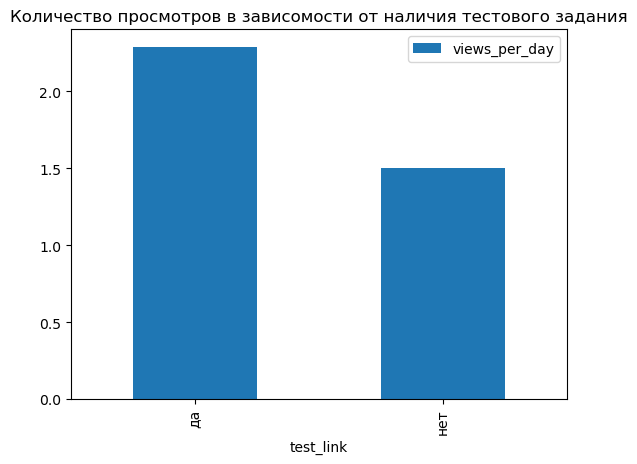

In [30]:
test_views = df.pivot_table(index='test_link', values='views_per_day').reset_index()
barplot_show(test_views, 'test_link', 'views_per_day', 'Количество просмотров в зависомости от наличия тестового задания')

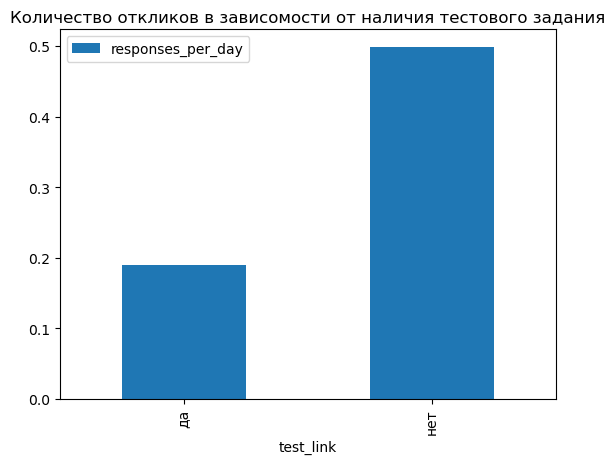

In [36]:
test_responses = df.pivot_table(index='test_link', values='responses_per_day').reset_index()
barplot_show(test_responses, 'test_link', 'responses_per_day', 'Количество откликов в зависомости от наличия тестового задания')

Количество просмотров незначительно больше у вакансий с тестовым заданием. Но количество откликов значительно выше на те вакансии, у которых тестового задания нет.
Посмотрим как связано количество городов, указанных в вакансии, с просмотрами и откликами.

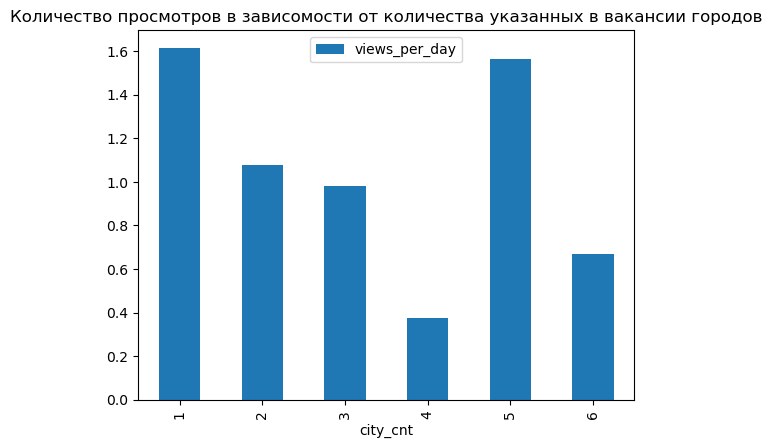

In [39]:
city_views = df.pivot_table(index='city_cnt', values='views_per_day').reset_index()
barplot_show(city_views, 'city_cnt', 'views_per_day', 'Количество просмотров в зависомости от количества указанных в вакансии городов')

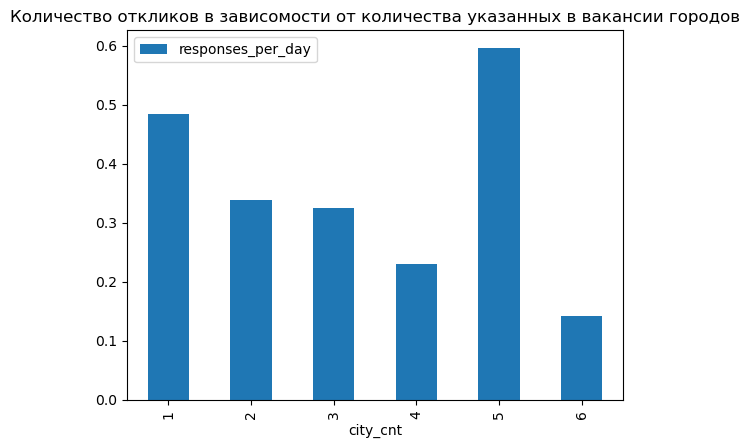

In [40]:
city_responses = df.pivot_table(index='city_cnt', values='responses_per_day').reset_index()
barplot_show(city_responses, 'city_cnt', 'responses_per_day', 'Количество откликов в зависомости от количества указанных в вакансии городов')

Количество просмотров и откликов немного больше у вакансий, в которых указаны 1 и 5 городов.
Посмотрим как связаны просмотры и отклики с возможностью заключения трудового договора.

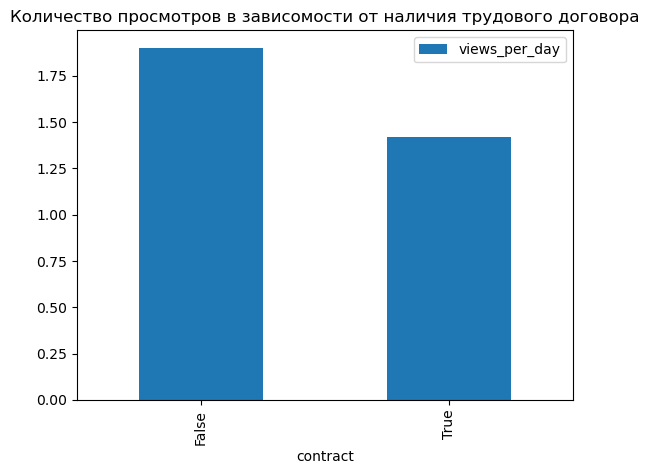

In [41]:
contract_views = df.pivot_table(index='contract', values='views_per_day').reset_index()
barplot_show(contract_views, 'contract', 'views_per_day', 'Количество просмотров в зависомости от наличия трудового договора')

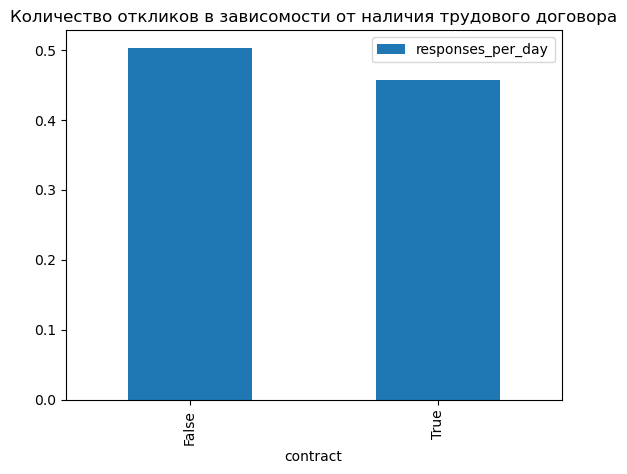

In [42]:
contract_responses = df.pivot_table(index='contract', values='responses_per_day').reset_index()
barplot_show(contract_responses, 'contract', 'responses_per_day', 'Количество откликов в зависомости от наличия трудового договора')

Количество просмотров и откликов у вакансий с возможностью заключения трудового договора и без него примерно одинаковое.
Посмотрим как связаны просмотры и отклики с возможностью удаленной работы.

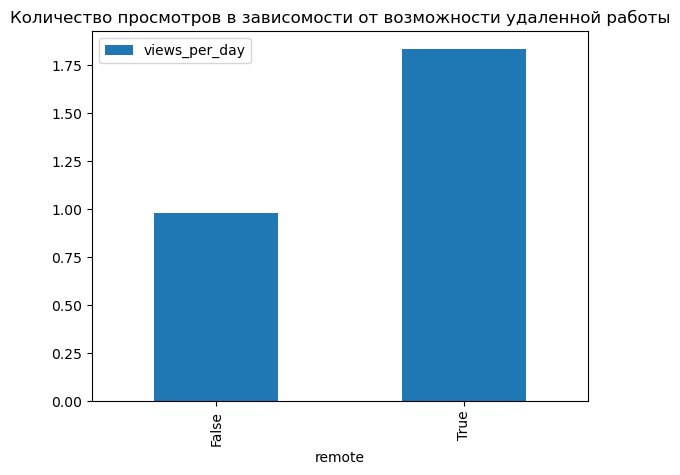

In [44]:
remote_views = df.pivot_table(index='remote', values='views_per_day').reset_index()
barplot_show(remote_views, 'remote', 'views_per_day', 'Количество просмотров в зависомости от возможности удаленной работы')

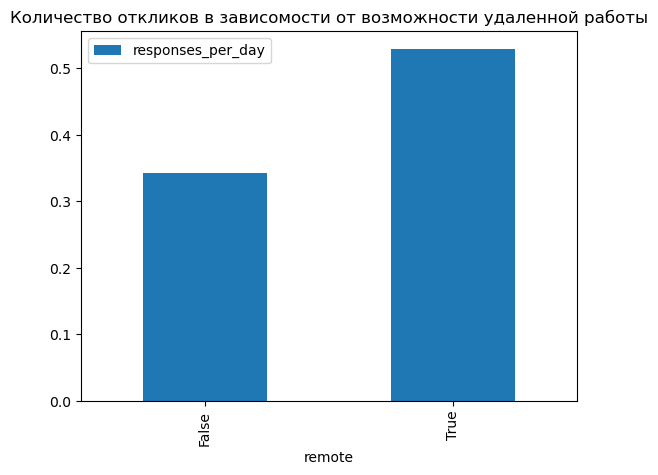

In [45]:
remote_responses = df.pivot_table(index='remote', values='responses_per_day').reset_index()
barplot_show(remote_responses, 'remote', 'responses_per_day', 'Количество откликов в зависомости от возможности удаленной работы')

Количество просмотров и откликов больше у вакансий с возможностью удаленной работы.
Посмотрим как связаны просмотры и отклики с полной занятостью.

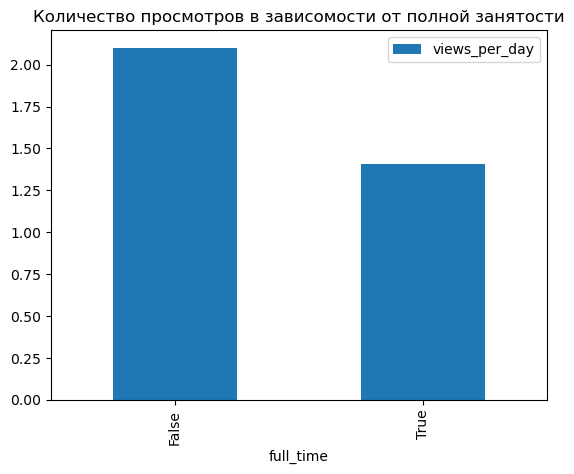

In [46]:
full_time_views = df.pivot_table(index='full_time', values='views_per_day').reset_index()
barplot_show(full_time_views, 'full_time', 'views_per_day', 'Количество просмотров в зависомости от полной занятости')

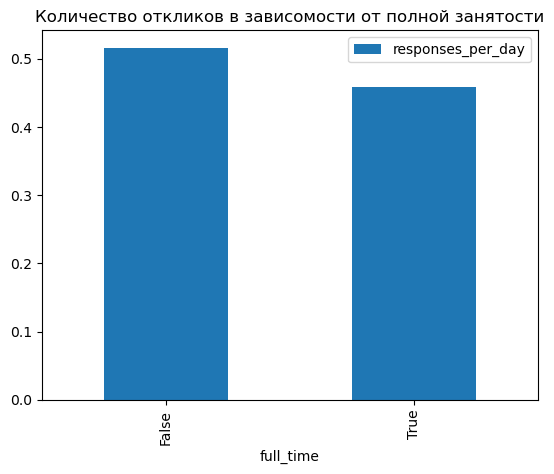

In [47]:
full_time_responses = df.pivot_table(index='full_time', values='responses_per_day').reset_index()
barplot_show(full_time_responses, 'full_time', 'responses_per_day', 'Количество откликов в зависомости от полной занятости')

Количество просмотров и откликов больше у вакансий, которая не предполагает полной занятости.
Посмотрим как связаны просмотры и отклики с указанием заработной платы в вакансии.

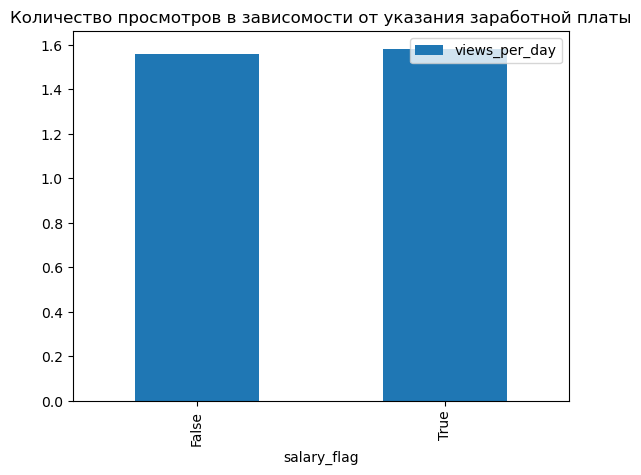

In [48]:
salary_flag_views = df.pivot_table(index='salary_flag', values='views_per_day').reset_index()
barplot_show(salary_flag_views, 'salary_flag', 'views_per_day', 'Количество просмотров в зависомости от указания заработной платы')

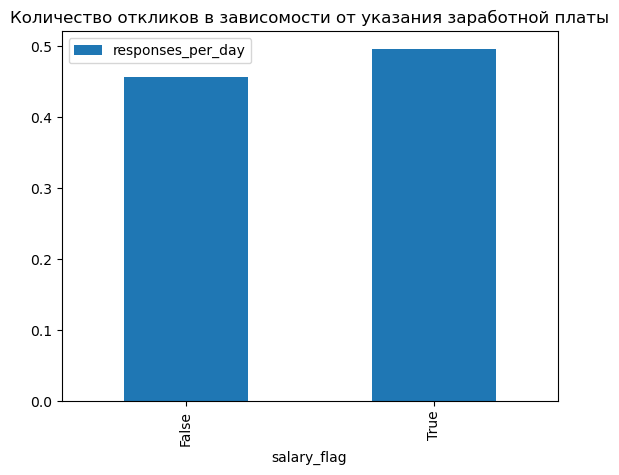

In [49]:
salary_flag_responses = df.pivot_table(index='salary_flag', values='responses_per_day').reset_index()
barplot_show(salary_flag_responses, 'salary_flag', 'responses_per_day', 'Количество откликов в зависомости от указания заработной платы')

У вакансий с указанной заработной платой и неуказанной примерно равное количество просмотров и откликов.

In [68]:
df['days_cnt'].describe()

count    1014.000000
mean       46.750493
std        41.591962
min         1.000000
25%        20.000000
50%        35.000000
75%        59.000000
max       294.000000
Name: days_cnt, dtype: float64

Вакансия обычно закрывается в течение месяца (50%). Быстрым может считаться закрытие вакансии менее, чем за три недели. Долгим может считаться закрытие более, чем за два месяца.